In [1]:
import os
import sys

print(os.environ['SPARK_HOME'])
print(os.environ['HADOOP_HOME'])

#bewaar environment variable SPARK_HOME in spark_path. SPARK_HOME is gezet in de enviroment variables in windows
spark_path = os.environ['SPARK_HOME']
#gebruik onderstaande als SPARK_HOME niet is gezet in de windows en
#spark_path ="c:/spark"

sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.3-src.zip")

C:\spark
c:\hadoop


In [2]:
from pyspark import SparkContext
from pyspark import SparkConf

In [3]:
conf = SparkConf().setAppName("Test").setMaster("local[2]")

sc = SparkContext(conf=conf)

In [12]:
import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0 for i in range(TOTAL)]).cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

Number of random points: 1000000
Mean: [-0.0002216  -0.00096744]
stdev: [ 0.57707816  0.57726612]


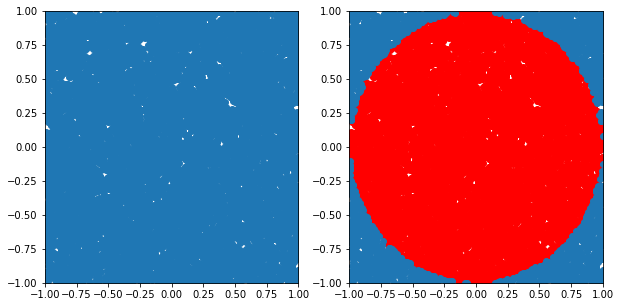

In [13]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout)

In [14]:
pi = 4.0 * (dots.filter(inCircle).count() / float(TOTAL))
print("The estimation of \pi is:", pi)

The estimation of \pi is: 3.14312
